In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Load data
df = pd.read_csv("traffic_weather_full2020_cleaned.csv")
df.head()

,5 Minutes,Flow,(mph),week_day,holidays,Hour,Temperature,Dew Point,Humidity,Wind Speed,...,Condition_Fog,Condition_Haze,Condition_Heavy Rain,Condition_Light Rain,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Thunder in the Vicinity
0,2020-02-01 00:15:00,337,65.4,6,1,0,55.0,29.0,37.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-01 00:20:00,302,66.3,6,1,0,55.0,29.0,37.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-01 00:25:00,282,65.3,6,1,0,55.0,29.0,37.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-01 00:30:00,302,66.2,6,1,0,55.0,29.0,37.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-01 00:35:00,277,66.2,6,1,0,55.0,29.0,37.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.isnull().sum()

5 Minutes                            0
Flow                                 0
(mph)                                0
week_day                             0
holidays                             0
Hour                                 0
Temperature                          0
Dew Point                            0
Humidity                             0
Wind Speed                           0
Wind Gust                            0
Pressure                             0
Precip.                              0
Day_of_Month                         0
Flow_Lag1                            0
Flow_Lag2                            0
Flow_Lag3                            0
Wind_CALM                            0
Wind_E                               0
Wind_ENE                             0
Wind_ESE                             0
Wind_N                               0
Wind_NE                              0
Wind_NNE                             0
Wind_NNW                             0
Wind_NW                  

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    explained_variance_score, max_error
)

#### Feature Selection

In [6]:
columns = df.columns
columns

Index(['5 Minutes', 'Flow', '(mph)', 'week_day', 'holidays', 'Hour',
       'Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust',
       'Pressure', 'Precip.', 'Day_of_Month', 'Flow_Lag1', 'Flow_Lag2',
       'Flow_Lag3', 'Wind_CALM', 'Wind_E', 'Wind_ENE', 'Wind_ESE', 'Wind_N',
       'Wind_NE', 'Wind_NNE', 'Wind_NNW', 'Wind_NW', 'Wind_S', 'Wind_SE',
       'Wind_SSE', 'Wind_SSW', 'Wind_SW', 'Wind_VAR', 'Wind_W', 'Wind_WNW',
       'Wind_WSW', 'Condition_Blowing Dust', 'Condition_Cloudy',
       'Condition_Cloudy / Windy', 'Condition_Fair', 'Condition_Fair / Windy',
       'Condition_Fog', 'Condition_Haze', 'Condition_Heavy Rain',
       'Condition_Light Rain', 'Condition_Mostly Cloudy',
       'Condition_Mostly Cloudy / Windy', 'Condition_Partly Cloudy',
       'Condition_Partly Cloudy / Windy', 'Condition_Rain',
       'Condition_Thunder in the Vicinity'],
      dtype='object')

In [7]:
features = ['(mph)', 'week_day', 'holidays', 'Hour',
       'Temperature', 'Humidity', 'Wind Speed', 'Wind Gust',
       'Precip.', 'Flow_Lag1', 'Flow_Lag2','Flow_Lag3']

In [8]:
# Select all fatures
X_full = df.drop(['5 Minutes', 'Flow'], axis=1)

# Remove low correlated features
X_partial = df[features]
y = df['Flow']

#### Data Spliting

In [9]:
split_point = int(0.8 * len(df))  # Calculate the 80% split index
X_train_full, X_test_full = X_full[:split_point], X_full[split_point:]
X_train_partial, X_test_partial = X_partial[:split_point], X_partial[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

In [10]:
scaler = StandardScaler()

# Fit the scaler on the training set and transform both training and test sets
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_full_scaled = scaler.transform(X_test_full)

X_train_partial_scaled = scaler.fit_transform(X_train_partial)
X_test_partial_scaled = scaler.transform(X_test_partial)

#### Random Forest

In [11]:
#Scaling is not required because Random Forest uses decision trees, which split data based on feature
#values and are not sensitive to their scale. Use the unscaled data for Random Forest training and testing.

## Using Partial Features that was used for SVM and KNN
# Initialize model using unscaled data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train Random Forest model
rf_model.fit(X_train_partial, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_partial)

# Evaluate Random Forest model
mae_rf = mean_absolute_error(y_test, rf_predictions)
mse_rf = mean_squared_error(y_test, rf_predictions)
rmse_rf = mean_squared_error(y_test, rf_predictions, squared=False)
r2_rf = r2_score(y_test, rf_predictions)
mape_rf = (abs((y_test - rf_predictions)/y_test).mean())*100
evs_rf = explained_variance_score(y_test, rf_predictions)
max_err_rf = max_error(y_test, rf_predictions)

In [17]:
import pickle

Pkl_Filename = "RF_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(rf_model, file)

with open(Pkl_Filename, 'rb') as file:
    pickled_RF_Model = pickle.load(file)

pickled_RF_Model

RandomForestRegressor(random_state=42)

In [18]:
score = pickled_RF_Model.score(X_test_partial, y_test)
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))

# Predict the Labels using the reloaded Model
Ypredict = pickled_RF_Model.predict(X_test_partial)

Ypredict

Test score: 97.12 %


array([405.58, 405.51, 398.85, ..., 194.72, 191.33, 179.42])

#### Linear Regression

In [12]:
#Scaling is necessary because Linear Regression is sensitive to the magnitude of feature values.
#Features with larger numerical ranges might dominate the optimization process if not scaled.
#Use the scaled data for Linear Regression training and testing.

## Using Partial Features
# Initialize model
lr_model = LinearRegression()

# Train Linear Regression model
lr_model.fit(X_train_partial_scaled, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_partial_scaled)

# Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, lr_predictions)
mse_lr = mean_squared_error(y_test, lr_predictions)
rmse_lr = mean_squared_error(y_test, lr_predictions, squared=False)
r2_lr = r2_score(y_test, lr_predictions)
mape_lr = (abs((y_test - lr_predictions)/y_test).mean())*100
evs_lr = explained_variance_score(y_test, lr_predictions)
max_err_lr = max_error(y_test, lr_predictions)

In [19]:
Pkl_Filename = "LR_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(lr_model, file)

with open(Pkl_Filename, 'rb') as file:
    pickle_LR_Model = pickle.load(file)

pickle_LR_Model

LinearRegression()

In [20]:
score = pickle_LR_Model.score(X_test_partial_scaled, y_test)
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))

# Predict the Labels using the reloaded Model
Ypredict = pickle_LR_Model.predict(X_train_partial_scaled)

Ypredict

Test score: 97.06 %


array([354.50624473, 348.79550217, 324.11175063, ..., 416.52274232,
       403.0378828 , 391.67493565])

In [13]:
# Compile results
metrics_rf = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
               'R^2 Score (R2)', 'Mean Absolute Percentage Error (MAPE)', 'Explained Variance Score (EVS)'],
    'Random Forest': [mae_rf, mse_rf, rmse_rf, r2_rf, mape_rf, evs_rf]
}

metrics_lr = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
               'R^2 Score (R2)', 'Mean Absolute Percentage Error (MAPE)', 'Explained Variance Score (EVS)'],
    'Linear Regression': [mae_lr, mse_lr, rmse_lr, r2_lr, mape_lr, evs_lr]
}

df_rf = pd.DataFrame(metrics_rf)
df_lr = pd.DataFrame(metrics_lr)

df_results = pd.merge(df_rf, df_lr, on='Metric')
df_results

,Metric,Random Forest,Linear Regression
0,Mean Absolute Error (MAE),20.687570,20.979817
1,Mean Squared Error (MSE),833.510591,850.055298
2,Root Mean Squared Error (RMSE),28.870583,29.155708
3,R^2 Score (R2),0.971183,0.970611
4,Mean Absolute Percentage Error (MAPE),5.357619,5.588570
5,Explained Variance Score (EVS),0.971222,0.970612


Note:<br/>
Mean Squared Error (MSE): Lower values indicate better performance, as it shows the average squared difference between predicted and actual values.<br/>
R² Score: Values closer to 1 indicate better performance, as it measures the proportion of variance in the target variable explained by the model.

**Our best model is Random Forest.**

## Interpreting Model's Results

* Analyze the Predictions: Use the best-performing model to make predictions on test data and interpret the results. Look for patterns, such as how traffic flow varies with weather, time of day, or day of the week.<br/>
* Feature Importance Analysis: For models like Random Forest, you can analyze feature importance to identify which variables (e.g., temperature, humidity, rush hour indicator) have the most impact on traffic flow. This helps in understanding what factors drive traffic patterns.

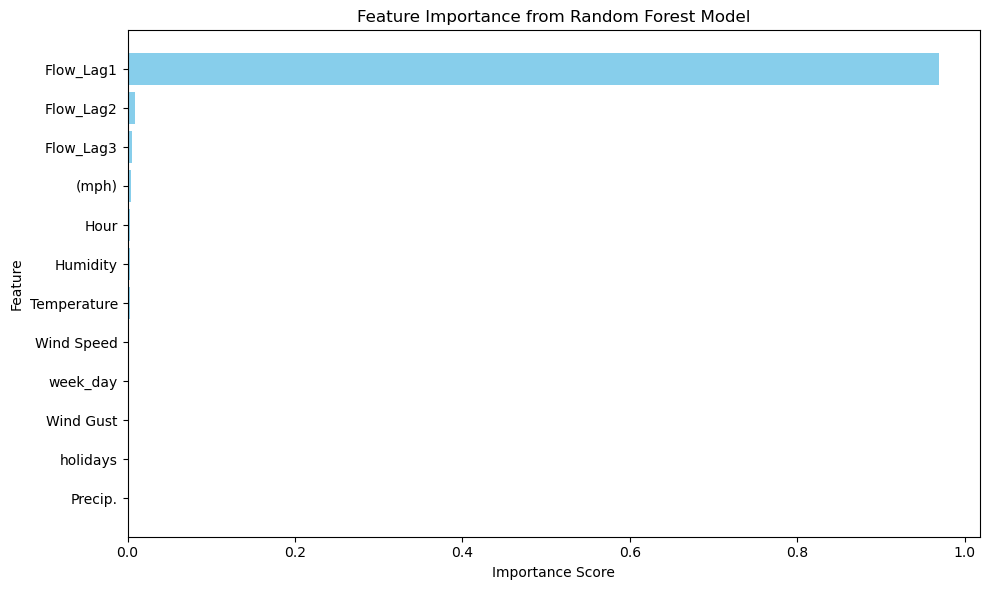

In [14]:
# Check if the Random Forest model has feature importance attribute
if hasattr(rf_model, 'feature_importances_'):
    # Extract feature importance and feature names
    feature_importance = rf_model.feature_importances_
    feature_names = X_train_partial.columns

    # Create a DataFrame for better visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.title('Feature Importance from Random Forest Model')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.tight_layout()
    plt.show()
else:
    print("Random Forest model does not support feature importance analysis.")

Code Explanation
1. Feature Importance (Random Forest)<br/>
- The code checks if the Random Forest model supports feature importance analysis.
- It extracts the feature importance scores and visualizes them in a horizontal bar chart to highlight which features (e.g., temperature, time, humidity) have the most impact on traffic flow predictions.<br/>
<br/>
Result: Flow Lag 1 is the most important feature in Random Forest model that has the most impact on traffic flow predictions.

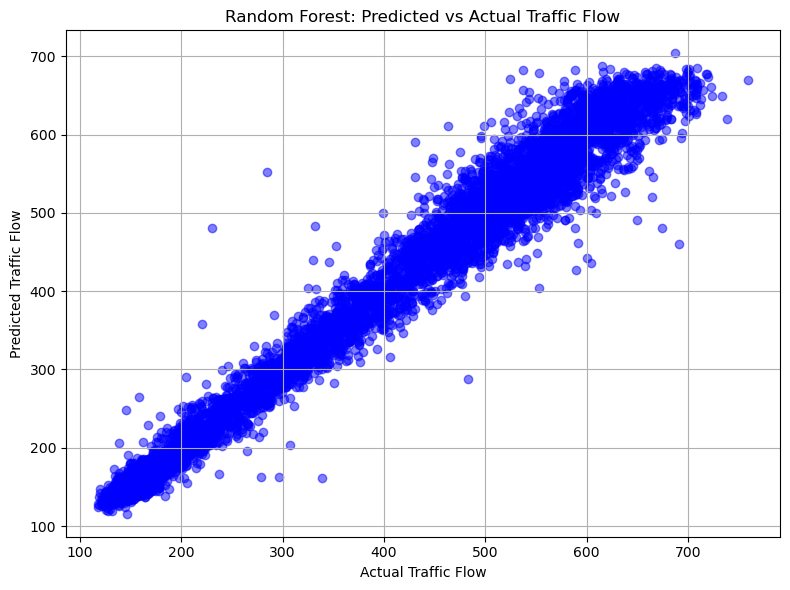

In [15]:
# Predictions vs Actual Values for Random Forest model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, color='blue')
plt.title('Random Forest: Predicted vs Actual Traffic Flow')
plt.xlabel('Actual Traffic Flow')
plt.ylabel('Predicted Traffic Flow')
plt.grid(True)
plt.tight_layout()
plt.show()

Code Explanation<br/>
<br/>
2. Predictions vs Actual Values<br/>
- The code uses the best-performing model (Random Forest) to make predictions on the test set.
- It plots the predicted values against the actual values in a scatter plot to evaluate how closely the predictions match the actual data.<br/>
<br/>
Result: In this graph, the points are clustered closely around this diagonal, suggesting the Random Forest model performs well overall (making accurate predictions for most traffic flow values).

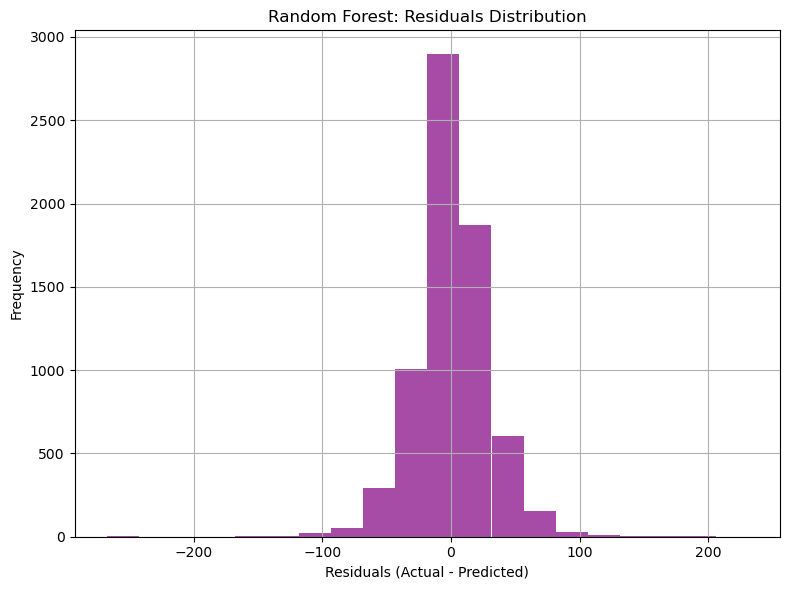

In [16]:
# Residual Analysis (difference between actual and predicted values) for Random Forest model
rf_residuals = y_test - rf_predictions

plt.figure(figsize=(8, 6))
plt.hist(rf_residuals, bins=20, color='purple', alpha=0.7)
plt.title('Random Forest: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Code Explanation
3. Residual Analysis<br/>
- The residuals (differences between actual and predicted values) are calculated and visualized in a histogram.
- This helps identify any bias in the model and ensures that residuals are normally distributed (a sign of a good model fit).<br/>
<br/>
Result: The Random Forest model performs well with most residuals close to zero, indicating accurate predictions.
The symmetric distribution suggests no significant bias in the model.